# Лабораторная работа №7
## Алгоритм Дейкстры поискага кратчайшего пути
### Задание
Разработать программу на языке высокого уровня, находящую кратчайший путь в транспортной сети с помощью алгоритма Дейкстры. Программа должна содержать проверку на наличие отрицательных циклов в транспортной сети и поддерживать обработку сетей с количеством рёбер, близким к V(V - 1)/2. 

In [1]:
import csv
import graphviz
file = "vgraph.csv"

In [2]:
def dijkstra(graph):
    marked = [min(graph.keys())]
    potentials = {}
    for a in graph.keys():
        if a == marked[0]:
            potentials[a] = 0
        else:
            potentials[a] = float("inf")
    while max(graph.keys()) not in marked:
        unmarked = [a for v in marked for a in graph[v].keys()]
        unmarked = set(filter(lambda a: a not in marked,unmarked))
        p = {a:float("inf") for a in unmarked}
        for v in marked:
            for w in unmarked:
                if w in graph[v].keys() and p[w] > potentials[v] + graph[v][w]:
                    p[w] = potentials[v] + graph[v][w]
        p_min = min(p, key = p.get)
        marked.append(p_min)
        potentials[p_min] = p[p_min]
    current = (max(graph.keys()),potentials[max(graph.keys())])
    path = ""
    while current[1]!=0:
        path = "-"+str(current[0])+path
        inc = list(filter(lambda x: current[0] in graph[x].keys(),graph.keys()))
        for i in inc:
            edge = graph[i][current[0]]
            if current[1] - edge == potentials[i]:
                current = (i, potentials[i])
                break
    path = str(min(graph.keys())) + path
    return potentials[max(graph.keys())] , path

In [3]:
def csvwrite(adj ,FILENAME):
    with open(FILENAME, "w", newline="") as file:
        wr = csv.writer(file)  
        for a in adj.keys():
            Time = []
            Time.append(a)
            for b in adj[a].keys():
                Time.append(b)
                Time.append(adj[a][b])
            wr.writerow(Time)   

In [4]:
def csvread(FILENAME):
    adj = {}
    with open(FILENAME) as file:
        reader = csv.reader(file)
        for row in reader:
            st = int(row[0])
            adj[st]=[]
            for a in row[1:]:
                Time = []
                for b in a:
                    try:
                        Time.append(int(b))
                    except:
                        continue
                adj[st].append(Time)
    return adj

In [5]:
def grvizual(adj):
    graph = graphviz.Digraph() 
    for a in adj.keys():
        for b in adj[a].keys():
            graph.edge(str(a),str(b),label = str(adj[a][b]))
    return graph

In [6]:
def adj2adj2(adj):
    adj2 = {}
    for a in adj.keys():
        adj2[a] = {}
        for b in adj[a]:
            adj2[a][b[0]] = b[1]
    return adj2

(4, '0-1-6')


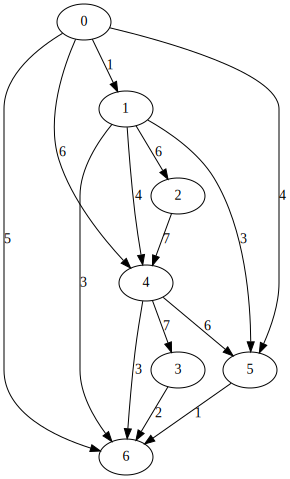

In [7]:
adj = csvread(file)
adj = adj2adj2(adj)
#print(adj)
print (dijkstra(adj))
graph = grvizual (adj)
graph